In [62]:
import requests
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import datetime

In [63]:
#QTN 1
csv_url = 'https://health-infobase.canada.ca/src/data/covidLive/covid19.csv'
req = requests.get(csv_url)
url_content = req.content
csv_file = open('covid19.csv', 'wb')

csv_file.write(url_content)
csv_file.close()

with open("covid19.csv","r") as file:
    reader = csv.reader(file)
    next(reader, None) #just to remove the header
    data=list(reader)

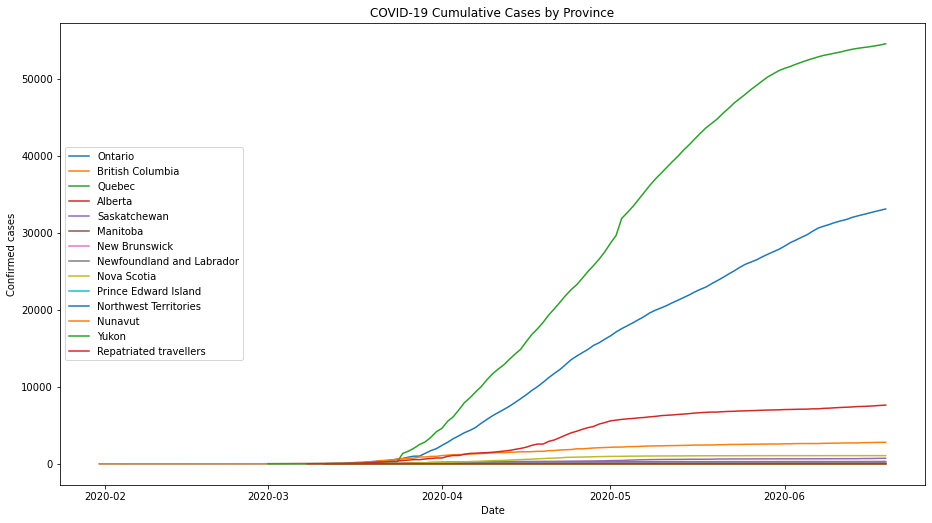

In [69]:
#QTN 2
#get the uid of provinces and their names into a dictionary
uidNamePr = {}
for row in data:
    if row[0] not in uidNamePr.keys():
        uidNamePr[row[0]] = row[1]

#get data for each province
fig=plt.figure()
fig.set_size_inches(15.5, 8.5)
for prid in uidNamePr.keys():
    x_vec = []
    y_vec = []
    for row in data:        
        if row[0] == prid:   
            datetime_object = datetime.datetime.strptime(row[3], '%d-%m-%Y')
            x = dates.date2num(datetime_object)         
            x_vec.append(dates.num2date(x))#the date            
            y_vec.append(int(row[4]))#the totalCases     
    if prid != '1' : #remove canada from the list
        plt.plot_date(x_vec,y_vec,fmt="-", label=uidNamePr.get(prid),xdate=True, ydate=False)

plt.xlabel("Date")
plt.ylabel("Confirmed cases")
plt.title('COVID-19 Cumulative Cases by Province')
plt.legend(loc='center left') #bbox_to_anchor=(1, 0.5))
fig.savefig('Q2.png', bbox_inches='tight')


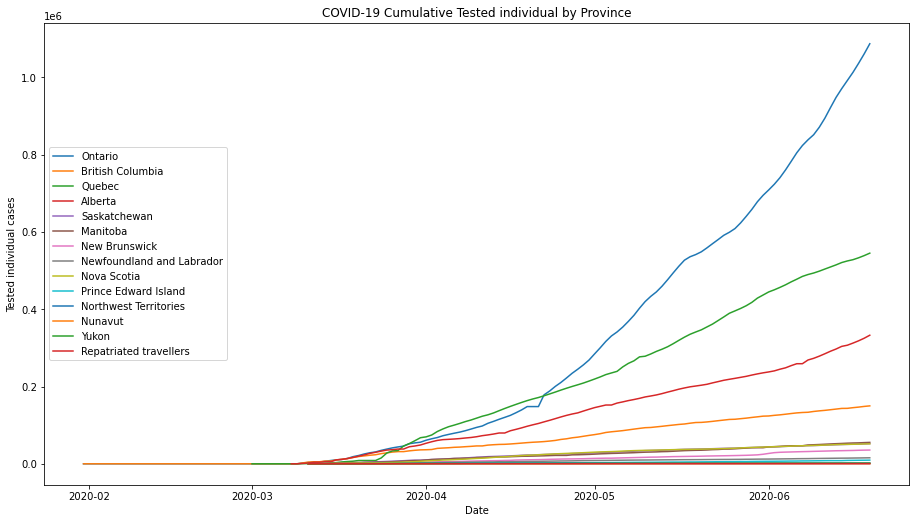

In [72]:
#QTN 3

#get individual tested data (9th column[8]) for each province
fig=plt.figure()
fig.set_size_inches(15.5, 8.5)
for prid in uidNamePr.keys():
    x_vec = []
    y_vec = []
    for row in data:        
        if row[0] == prid:   
            datetime_object = datetime.datetime.strptime(row[3], '%d-%m-%Y')
            x = dates.date2num(datetime_object)         
            x_vec.append(dates.num2date(x))#the date
            test_ind = 0
            try:
                test_ind = int(row[8])
            except ValueError:
                test_ind = 0
            y_vec.append(test_ind)#the total test   
    if prid != '1' : #remove canada from the list
        plt.plot_date(x_vec,y_vec,fmt="-", label=uidNamePr.get(prid),xdate=True, ydate=False)

plt.xlabel("Date")
plt.ylabel("Tested individual cases")
plt.title('COVID-19 Cumulative Tested individual by Province')
plt.legend(loc='center left') #bbox_to_anchor=(1, 0.5))
fig.savefig('Q3.png', bbox_inches='tight')